<a href="https://colab.research.google.com/github/tintoretor/CIRTS/blob/master/Cash_Flow_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the CSV file
file_path = "Cash Flow Data - Sheet1.csv"
data = pd.read_csv(file_path, parse_dates=['Date'])

# Display the first few rows of the DataFrame to confirm successful upload
print(data.head())

        Date Department      Amount
0 2019-04-01         D2   44750.085
1 2019-04-01         D4   24094.335
2 2019-04-01         D5  586131.765
3 2019-04-01         D6   91341.735
4 2019-04-01         D7   43500.000


<ipython-input-2-39be33caac3f>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_path, parse_dates=['Date'])


In [3]:
# Reload the CSV file with explicit date parsing
data = pd.read_csv(file_path, parse_dates=['Date'], date_parser=lambda x: pd.to_datetime(x, format='%d-%b-%y'))

# Check the data types to ensure the 'Date' column is parsed correctly
print(data.dtypes)

Date          datetime64[ns]
Department            object
Amount               float64
dtype: object


<ipython-input-3-c91826522ef6>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(file_path, parse_dates=['Date'], date_parser=lambda x: pd.to_datetime(x, format='%d-%b-%y'))


In [4]:
# Group by department and aggregate data
department_data = data.groupby(['Department', pd.Grouper(key='Date', freq='M')])['Amount'].sum().reset_index()

# Preview the grouped data
print(department_data.head())


  Department       Date        Amount
0         D1 2019-04-30 -2.898856e+07
1         D1 2019-05-31 -3.608895e+07
2         D1 2019-06-30 -2.629219e+07
3         D1 2019-07-31 -3.780899e+07
4         D1 2019-08-31 -2.968977e+07


<ipython-input-4-edfa643d632c>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  department_data = data.groupby(['Department', pd.Grouper(key='Date', freq='M')])['Amount'].sum().reset_index()


In [5]:
# Pivot the data for better analysis
time_series_data = department_data.pivot(index='Date', columns='Department', values='Amount')

# Preview the reshaped time series data
print(time_series_data.head())


Department            D1           D10            D2  D3            D4  \
Date                                                                     
2019-04-30 -2.898856e+07  4.132275e+09 -2.901245e+07 NaN -3.337354e+08   
2019-05-31 -3.608895e+07  4.060587e+09 -7.449973e+07 NaN -3.919078e+08   
2019-06-30 -2.629219e+07  3.850006e+09 -4.967288e+07 NaN -4.771138e+08   
2019-07-31 -3.780899e+07  4.306217e+09 -3.058598e+06 NaN -3.688437e+08   
2019-08-31 -2.968977e+07  4.048554e+09 -5.477359e+07 NaN -3.537666e+08   

Department            D5            D6            D7            D8  \
Date                                                                 
2019-04-30  6.557770e+07 -5.044075e+08 -2.818601e+08 -1.296326e+07   
2019-05-31  7.906364e+07 -9.292851e+08 -3.036010e+08 -7.441856e+06   
2019-06-30  8.354276e+07 -8.682157e+08 -2.426766e+08 -1.780189e+07   
2019-07-31  5.129511e+07 -3.150832e+08 -2.633470e+08 -1.341064e+07   
2019-08-31  2.257133e+07 -5.308038e+07 -2.464248e+08 -1.41062

## Use line plots to visualize trends over time for each department:

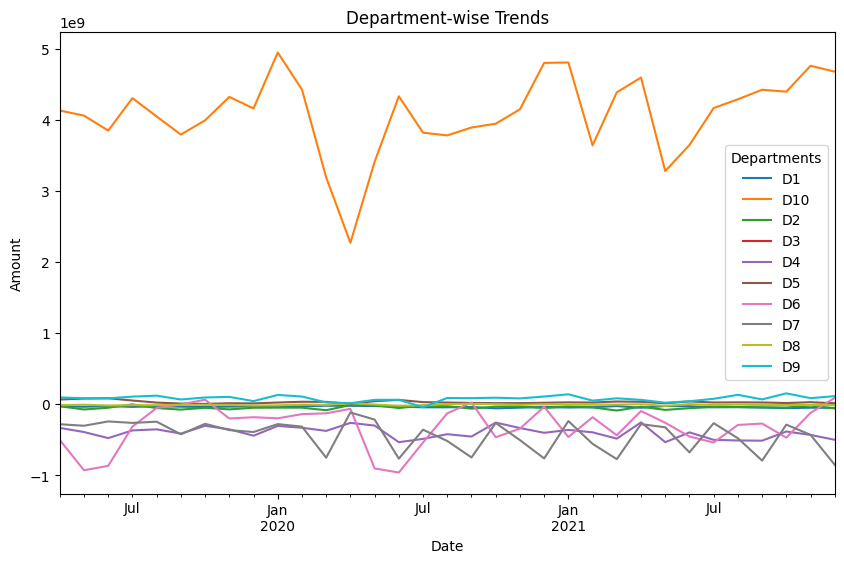

In [6]:
import matplotlib.pyplot as plt

time_series_data.plot(figsize=(10, 6), title='Department-wise Trends')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend(title='Departments')
plt.show()


## Calculate Summary Statistics

In [7]:
summary_stats = time_series_data.describe()
print(summary_stats)

Department            D1           D10            D2             D3  \
count       3.300000e+01  3.300000e+01  3.300000e+01       2.000000   
mean       -3.794777e+07  4.082678e+09 -4.676917e+07 -129509.145000   
std         9.786021e+06  5.435103e+08  2.145547e+07  167612.457062   
min        -5.825286e+07  2.270977e+09 -8.926274e+07 -248029.050000   
25%        -4.388919e+07  3.820380e+09 -5.590375e+07 -188769.097500   
50%        -3.780899e+07  4.148999e+09 -4.875465e+07 -129509.145000   
75%        -2.898856e+07  4.397492e+09 -3.234589e+07  -70249.192500   
max        -2.200999e+07  4.948401e+09 -3.058598e+06  -10989.240000   

Department            D4            D5            D6            D7  \
count       3.300000e+01  3.300000e+01  3.300000e+01  3.300000e+01   
mean       -3.996465e+08  2.909263e+07 -3.147717e+08 -4.354197e+08   
std         8.248719e+07  1.966401e+07  2.886921e+08  2.125175e+08   
min        -5.344838e+08  4.061618e+06 -9.615737e+08 -8.533719e+08   
25%       

## Stacked Area Plot

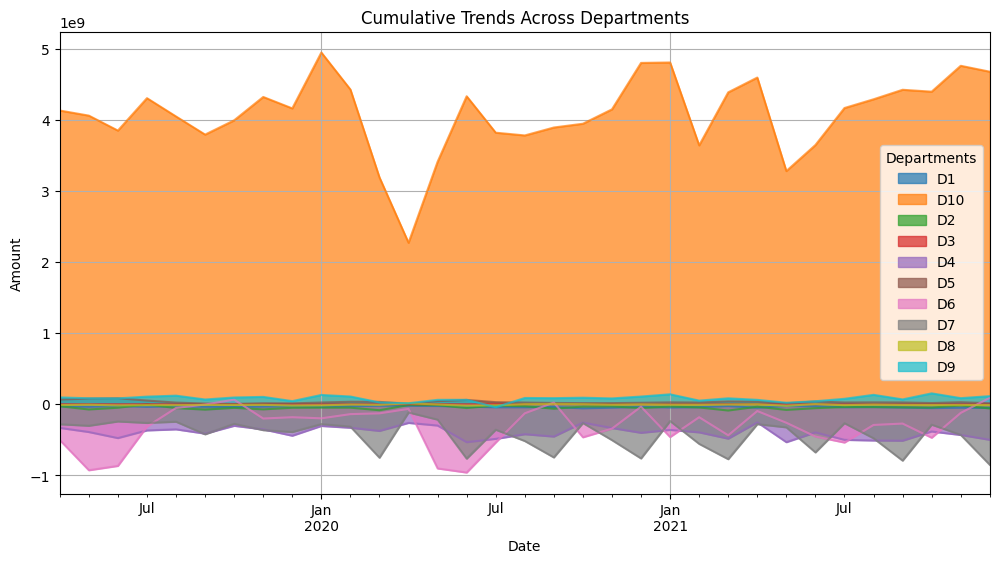

In [28]:
time_series_data.plot.area(figsize=(12, 6), title='Cumulative Trends Across Departments', alpha=0.7, stacked=False)
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend(title='Departments')
plt.grid(True)
plt.show()

## Bar Plot for a Specific Date Range

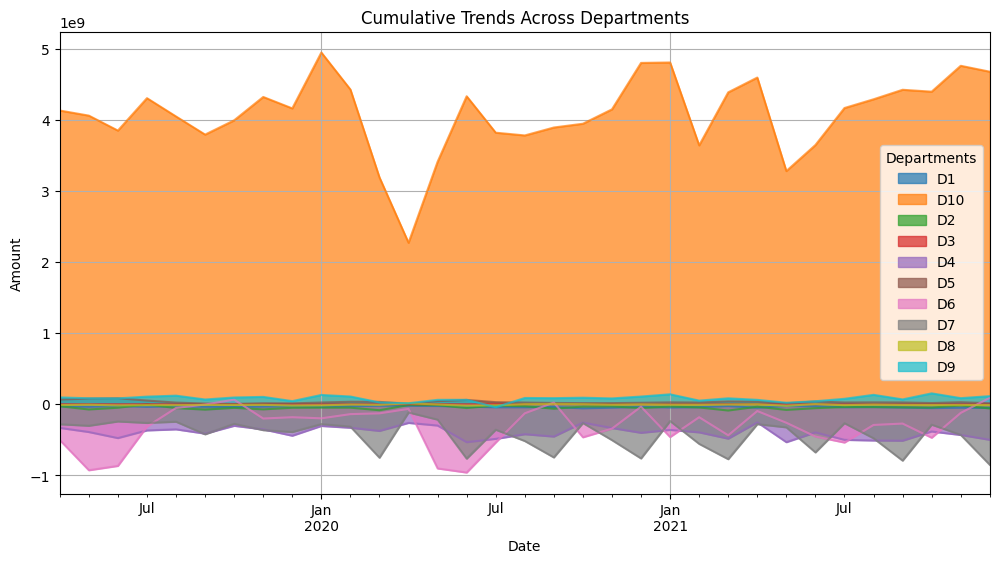

In [27]:
# Filter for a specific date range
time_series_data.plot.area(figsize=(12, 6), title='Cumulative Trends Across Departments', alpha=0.7, stacked=False)
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend(title='Departments')
plt.grid(True)
plt.show()

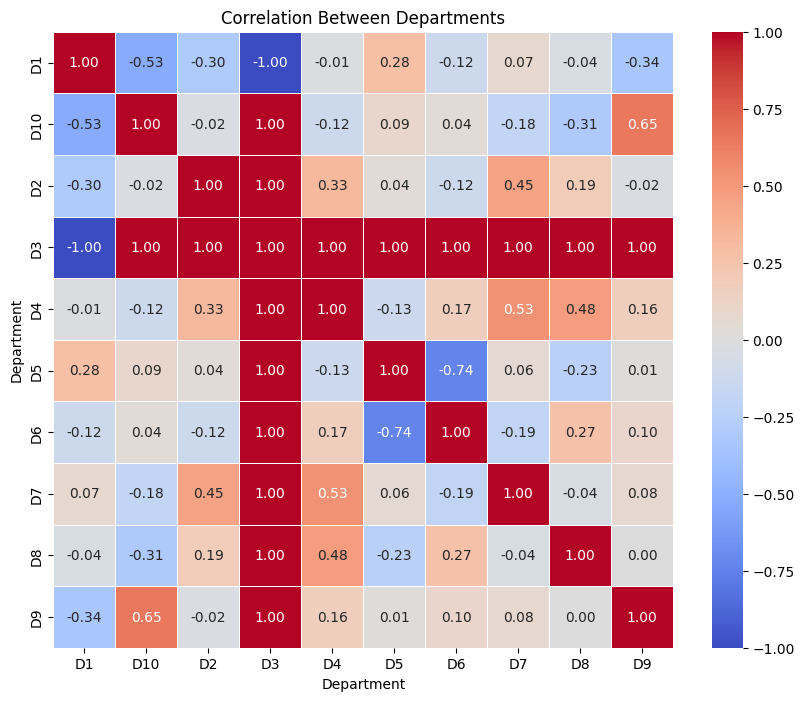

In [11]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(time_series_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Departments')
plt.show()



## Box Plot for Distribution by Department

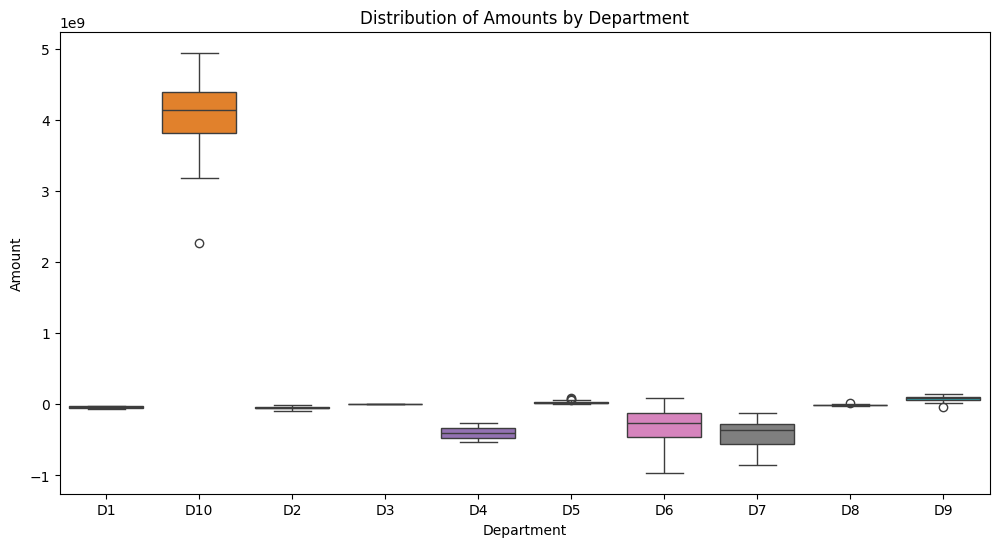

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=time_series_data)
plt.title('Distribution of Amounts by Department')
plt.xlabel('Department')
plt.ylabel('Amount')
plt.show()


# Moving Average to Highlight Trends
Add a moving average to smooth out fluctuations.

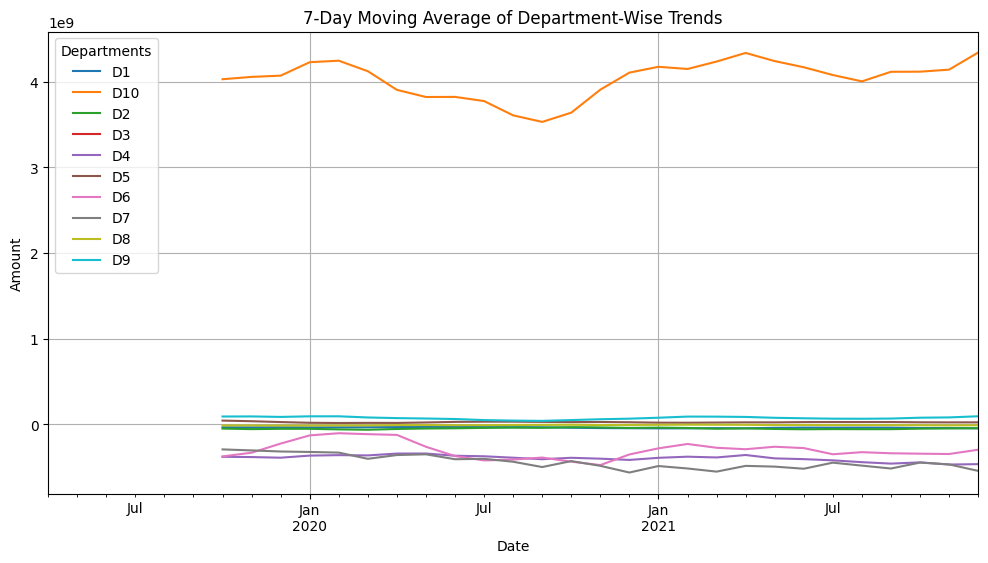

In [13]:
# Apply a rolling window for smoothing
smoothed_data = time_series_data.rolling(window=7).mean()

smoothed_data.plot(figsize=(12, 6), title='7-Day Moving Average of Department-Wise Trends')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend(title='Departments')
plt.grid(True)
plt.show()

# PREDICTION FOR EACH DEPT FOR NEXT DAY

Use ARIMA for Forecasting
We'll fit an ARIMA model for each department individually

## Check the Data
Ensure each department's time series is non-empty and formatted correctly.

In [14]:
# Check for empty columns or NaNs
print(time_series_data.isnull().sum())

# Check the data type and format
print(time_series_data.info())

Department
D1      0
D10     0
D2      0
D3     31
D4      0
D5      0
D6      0
D7      0
D8      0
D9      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 2019-04-30 to 2021-12-31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D1      33 non-null     float64
 1   D10     33 non-null     float64
 2   D2      33 non-null     float64
 3   D3      2 non-null      float64
 4   D4      33 non-null     float64
 5   D5      33 non-null     float64
 6   D6      33 non-null     float64
 7   D7      33 non-null     float64
 8   D8      33 non-null     float64
 9   D9      33 non-null     float64
dtypes: float64(10)
memory usage: 3.9 KB
None


## Handle Missing or Insufficient Data
Remove or interpolate missing values:

In [29]:
time_series_data = time_series_data.interpolate(method='time')  # Time-based interpolation


### Ensure each department has sufficient data points for ARIMA to work. Typically, ARIMA needs at least max(p, d, q) data points.



In [30]:
for department in time_series_data.columns:
    print(f"{department} has {time_series_data[department].dropna().size} data points")


D1 has 33 data points
D10 has 33 data points
D2 has 33 data points
D3 has 22 data points
D4 has 33 data points
D5 has 33 data points
D6 has 33 data points
D7 has 33 data points
D8 has 33 data points
D9 has 33 data points


# Resolve the Warning
The warning about "no frequency information" occurs when the Date index lacks proper frequency settings. Fix it by explicitly setting the frequency:

In [26]:
time_series_data.index = pd.to_datetime(time_series_data.index)  # Ensure datetime format
time_series_data = time_series_data.asfreq('M')  # Monthly frequency, adjust as needed


<ipython-input-26-46de2b8765f2>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_data = time_series_data.asfreq('M')  # Monthly frequency, adjust as needed


## Modify the ARIMA Model
Ensure you are passing valid data to the model:

In [24]:
#Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

for department in time_series_data.columns:
    series = time_series_data[department].dropna()
    if len(series) > 3:  # Ensure enough data points
        model = ARIMA(series, order=(1, 1, 1))  #Adjust order if necessary
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=1)
        print(f"Predicted value for {department}: {forecast[0]:.2f}")
    else:
        print(f"Not enough data to model {department}")

<ipython-input-24-35776d4f96e7>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")
<ipython-input-24-35776d4f96e7>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")


Predicted value for D1: -51344546.82
Predicted value for D10: 4624981179.24


<ipython-input-24-35776d4f96e7>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")


Predicted value for D2: -44939982.64


<ipython-input-24-35776d4f96e7>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")
<ipython-input-24-35776d4f96e7>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")


Predicted value for D3: -13908.50
Predicted value for D4: -458688793.86


<ipython-input-24-35776d4f96e7>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-24-35776d4f96e7>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")


Predicted value for D5: 13855240.70
Predicted value for D6: -104353294.10


<ipython-input-24-35776d4f96e7>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")
<ipython-input-24-35776d4f96e7>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")


Predicted value for D7: -419620549.57
Predicted value for D8: -8778237.28
Predicted value for D9: 84436975.52


<ipython-input-24-35776d4f96e7>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")


## Debugging the IndexError
The IndexError suggests the time series might be empty or improperly indexed.

In [25]:
#Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Check for valid data before modeling
for department in time_series_data.columns:
    series = time_series_data[department].dropna()
    if series.empty:
        print(f"Department {department} has no valid data for modeling.")
    else:
        # Proceed with ARIMA
        model = ARIMA(series, order=(1, 1, 1))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=1)
        print(f"Predicted value for {department}: {forecast[0]:.2f}")

<ipython-input-25-39096ee6002f>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")


Predicted value for D1: -51344546.82


<ipython-input-25-39096ee6002f>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")
<ipython-input-25-39096ee6002f>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")


Predicted value for D10: 4624981179.24
Predicted value for D2: -44939982.64


<ipython-input-25-39096ee6002f>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")
<ipython-input-25-39096ee6002f>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")


Predicted value for D3: -13908.50
Predicted value for D4: -458688793.86


<ipython-input-25-39096ee6002f>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted value for D5: 13855240.70


<ipython-input-25-39096ee6002f>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")
<ipython-input-25-39096ee6002f>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")


Predicted value for D6: -104353294.10
Predicted value for D7: -419620549.57
Predicted value for D8: -8778237.28
Predicted value for D9: 84436975.52


<ipython-input-25-39096ee6002f>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")
<ipython-input-25-39096ee6002f>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted value for {department}: {forecast[0]:.2f}")


## Validate ARIMA Assumptions
Stationarity: Ensure your data is stationary (e.g., no trend). Use differencing if needed:

In [20]:
from statsmodels.tsa.stattools import adfuller

for department in time_series_data.columns:
    series = time_series_data[department].dropna()
    result = adfuller(series)
    print(f"{department}: p-value = {result[1]}")
    if result[1] > 0.05:
        print(f"{department} is non-stationary. Consider differencing.")

D1: p-value = 0.3386290497496452
D1 is non-stationary. Consider differencing.
D10: p-value = 0.0007574764384724953
D2: p-value = 0.014760381622142972
D3: p-value = 0.20256738789718304
D3 is non-stationary. Consider differencing.
D4: p-value = 2.143030911600664e-05
D5: p-value = 0.005054600147343929
D6: p-value = 0.000597762507885472
D7: p-value = 0.4856170521926159
D7 is non-stationary. Consider differencing.
D8: p-value = 1.0563788925810134e-05
D9: p-value = 0.004666497594445575


## Explanation of Results
D1: p-value = 0.3386

p-value > 0.05 → Non-stationary. You need to make it stationary (e.g., differencing).
D10: p-value = 0.00076

p-value ≤ 0.05 → Stationary. No changes required.
D2: p-value = 0.01476

p-value ≤ 0.05 → Stationary.
D3: p-value = 0.2026

p-value > 0.05 → Non-stationary. Needs differencing.
D4, D5, D6, D8, and D9 all have p-values ≤ 0.05, indicating stationarity.

D7: p-value = 0.4856

p-value > 0.05 → Non-stationary. Needs differencing.

## Action Plan
For Non-Stationary Departments (D1, D3, D7):
Apply differencing to make the series stationary:

In [21]:
differenced_series = series.diff().dropna()  # First-order differencing


For Stationary Departments:
Proceed directly with modeling (e.g., ARIMA) without transformation.



## Why This Matters
ARIMA models require stationary data to function properly. Non-stationary data can lead to misleading results or failed model fitting. By making non-stationary series stationary, you ensure the model captures the actual patterns in the data.

## VISUALIZATION OF THE PREDICTED RESULT

<ipython-input-31-ddf5272b247c>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasted_values[department] = forecast[0]
<ipython-input-31-ddf5272b247c>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasted_values[department] = forecast[0]
<ipython-input-31-ddf5272b247c>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecasted_values[department] = forecast[0]
<ipython-input-31-ddf5272b247c>:19: FutureWarning: Series.

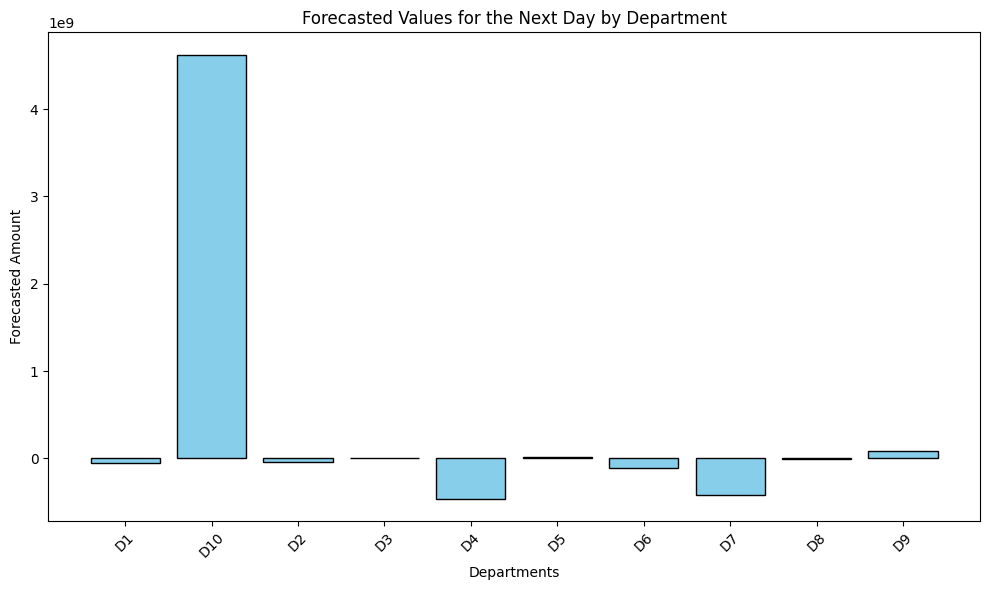

In [31]:
#Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt

# Initialize dictionary to store forecasted values
forecasted_values = {}

# Loop through each department
for department in time_series_data.columns:
    series = time_series_data[department].dropna()  # Drop missing values

    # Fit ARIMA model (or your chosen model)
    model = ARIMA(series, order=(1, 1, 1))  # Adjust (p, d, q) as per your data
    model_fit = model.fit()

    # Forecast next day's value
    forecast = model_fit.forecast(steps=1)
    forecasted_values[department] = forecast[0]

# Visualization
departments = list(forecasted_values.keys())
predicted_values = list(forecasted_values.values())

plt.figure(figsize=(10, 6))
plt.bar(departments, predicted_values, color='skyblue', edgecolor='black')
plt.xlabel('Departments')
plt.ylabel('Forecasted Amount')
plt.title('Forecasted Values for the Next Day by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Forecast for 3 Days:

Extend the ARIMA model's forecast to predict the next 3 days for each department.
Organize Forecasted Data:

Store the forecasted values in a DataFrame for easy visualization.
Plot Results:

Use matplotlib to create line graphs for each department, showing predicted values.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


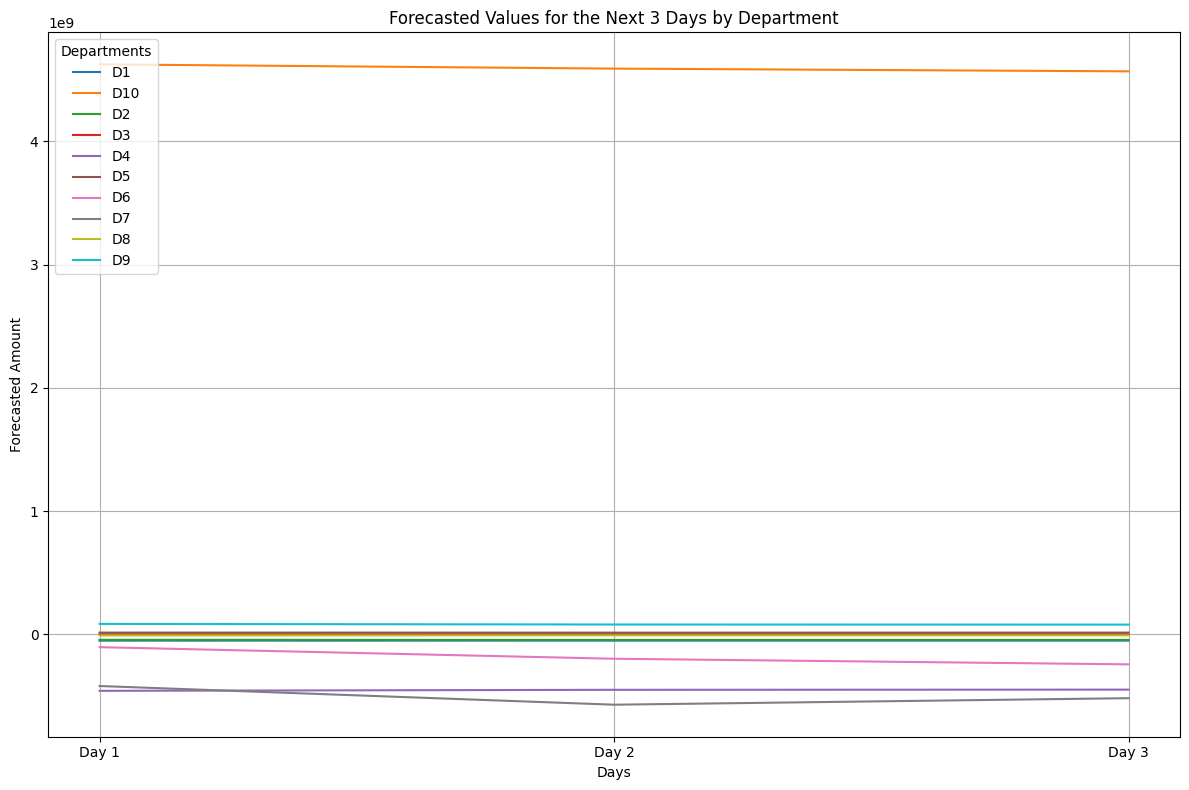

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Create a DataFrame to store forecasted values
forecast_df = pd.DataFrame()

# Forecast for each department
for department in time_series_data.columns:
    series = time_series_data[department].dropna()  # Drop missing values

    # Fit ARIMA model (adjust p, d, q as necessary)
    model = ARIMA(series, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast for the next 3 days
    forecast = model_fit.forecast(steps=3)
    forecast_df[department] = forecast

# Transpose to align with departments
forecast_df.index = ['Day 1', 'Day 2', 'Day 3']

# Visualization
plt.figure(figsize=(12, 8))
for department in forecast_df.columns:
    plt.plot(forecast_df.index, forecast_df[department], label=department)

plt.xlabel('Days')
plt.ylabel('Forecasted Amount')
plt.title('Forecasted Values for the Next 3 Days by Department')
plt.legend(title='Departments', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## Fit ARIMA for Monthly Forecasts:
Predict 30 days ahead for each department.
Combine Historical and Forecasted Data:
Plot both actual and forecasted data for comparison.
Enhance Visualization:
Use a professional style (like seaborn) for an attractive graph.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


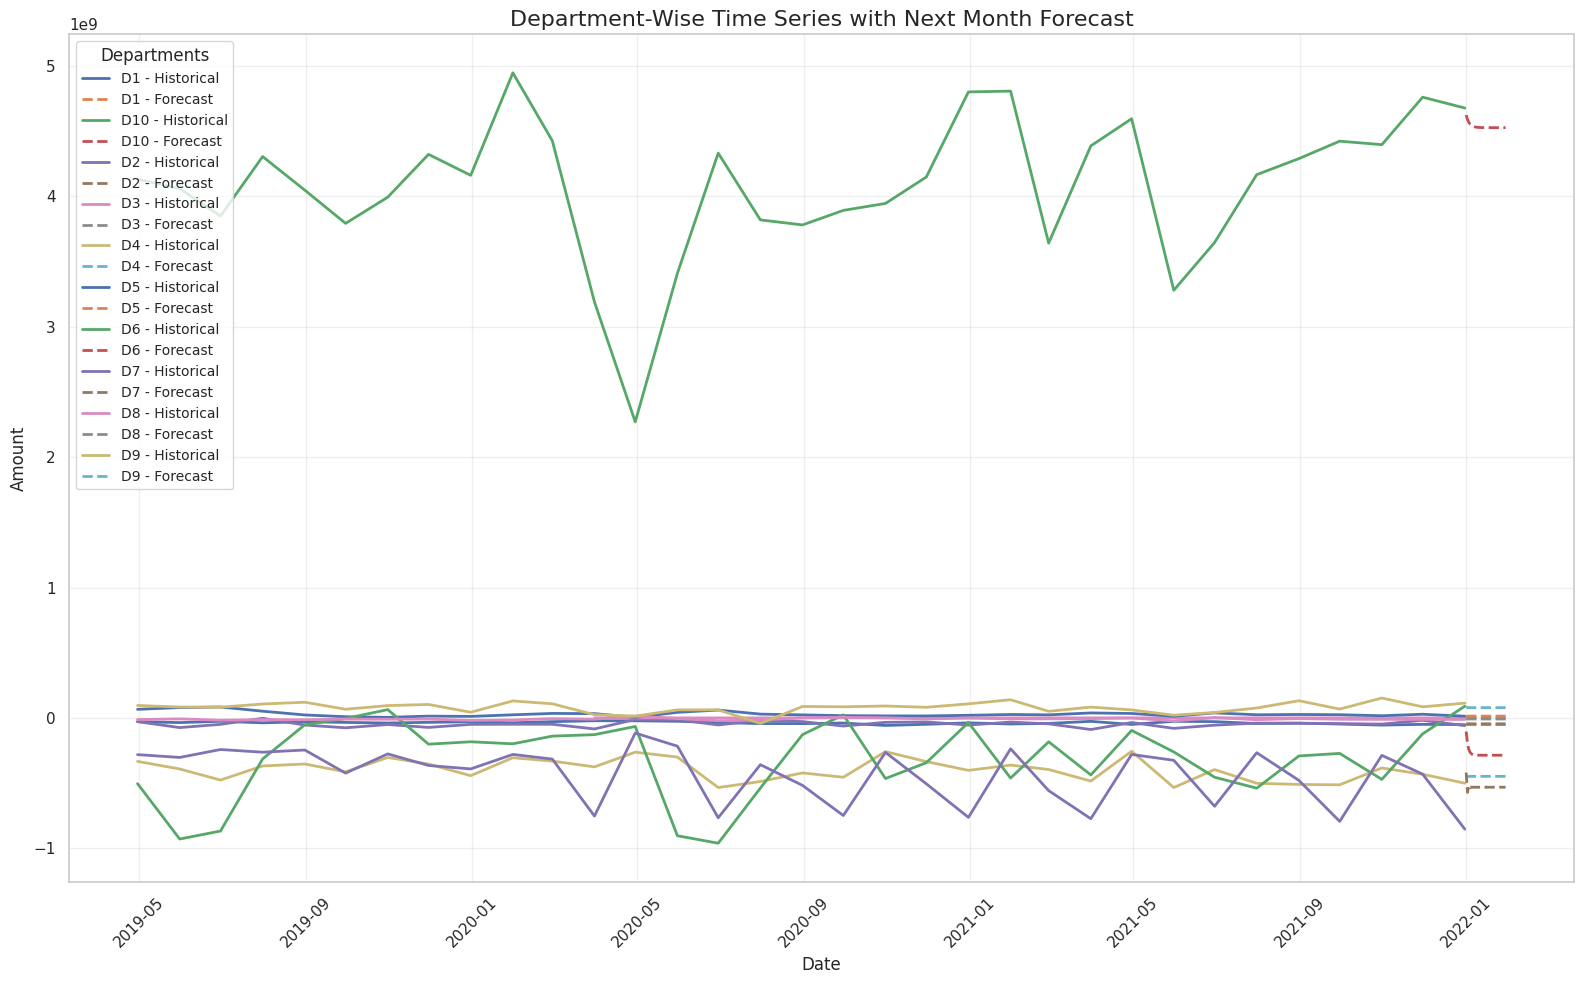

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

# Set style for the graph
sns.set_theme(style="whitegrid")

# DataFrame to store forecasted values for next month
monthly_forecast_df = pd.DataFrame()

# Predict next month (30 days) for each department
for department in time_series_data.columns:
    series = time_series_data[department].dropna()  # Drop missing values

    # Fit ARIMA model (adjust p, d, q as needed)
    model = ARIMA(series, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast for the next 30 days
    forecast = model_fit.forecast(steps=30)

    # Combine historical and forecasted data
    monthly_forecast_df[department] = forecast

# Adjust index for forecasted data
forecast_dates = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
monthly_forecast_df.index = forecast_dates

# Plot each department's historical and forecasted data
plt.figure(figsize=(16, 10))
for department in time_series_data.columns:
    # Plot historical data
    plt.plot(
        time_series_data.index, time_series_data[department],
        label=f'{department} - Historical', linestyle='-', linewidth=2
    )

    # Plot forecasted data
    plt.plot(
        monthly_forecast_df.index, monthly_forecast_df[department],
        label=f'{department} - Forecast', linestyle='--', linewidth=2
    )

# Add labels and legends
plt.title('Department-Wise Time Series with Next Month Forecast', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(title="Departments", loc='upper left', fontsize=10)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# Save and show the plot
plt.tight_layout()
plt.savefig("time_series_forecast.png", dpi=300)
plt.show()


In [34]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assume 'actual' contains the actual historical values and 'forecast' contains the predicted values
# These values could be your test data and the predicted values from your model

# Example data (replace this with your actual and forecasted data)
actual = np.array([100, 150, 200, 250, 300])  # Replace with actual values
forecast = np.array([110, 140, 210, 240, 310])  # Replace with forecasted values

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual, forecast)
print(f"Mean Absolute Error (MAE): {mae}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual - forecast) / actual)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 10.0
Root Mean Squared Error (RMSE): 10.0
Mean Absolute Percentage Error (MAPE): 5.8%


Mean Absolute Error (MAE) = 10.0:

This indicates that, on average, the forecasted values differ from the actual values by 10 units. In simple terms, your model has an average error of 10 in predicting the data.
Root Mean Squared Error (RMSE) = 10.0:

This metric measures the average magnitude of the error but penalizes larger errors more heavily (because of squaring the differences). In your case, the average error is 10 units, and since it’s similar to MAE, the error distribution isn’t too uneven. Lower RMSE values indicate better performance.
Mean Absolute Percentage Error (MAPE) = 5.8%:

This shows that, on average, the forecasted values deviate from the actual values by 5.8%. A lower MAPE (usually under 10%) means the model's forecasts are relatively accurate. In your case, a 5.8% error is considered quite good and indicates that the model’s predictions are fairly reliable.
Conclusion:
Your model is performing well:

The MAE and RMSE of 10.0 suggest that the model’s predictions are on average 10 units off from the actual values.
The MAPE of 5.8% indicates that the model's forecasts are around 5.8% away from the actual values, which is quite accurate in many cases.

In [39]:
#Defining accuracy_score, precision score, recall score and F1 score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example data (replace this with your actual and forecasted data)
y_true = np.array([0, 1, 1, 0, 1])  # Replace with actual labels
y_pred = np.array([0, 1, 0, 0, 1])  # Replace with predicted labels

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.8
Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8
